<a href="https://colab.research.google.com/github/Nadira173/DATA_AMS/blob/main/Preprocessing_Data_AMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT DATA

Untuk data mengenai keputusan MK terhadap sekolah negeri dan swasta gratis kami melakukan scrapping data dari X dan youtube API.

In [ ]:
!pip install squarify
!pip install Sastrawi
!pip install unidecode

import itertools, re, pickle
import time, operator, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import networkx as nx
import squarify
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from wordcloud import WordCloud

"DONE!!!"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


'DONE!!!'

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Nadira173/DATA_AMS/main/data%20fix%20-%20fulldata_with_sentiment.csv"

try:
    df = pd.read_csv(url)
    print(df.head())
except Exception as e:
    print("Terjadi kesalahan saat membaca file:", e)

                                                text sentiment username  \
0  MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...   neutral      NaN   
1  Komisi X DPR RI berkomitmen mengawal implement...   neutral      NaN   
2  MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...   neutral      NaN   
3  Respons Wamendagri Bima Arya soal Pendidikan G...   neutral      NaN   
4  Respons Pemkab Bantul Soal Putusan MK tentang ...   neutral      NaN   

                       created_at  likes  reply_count  \
0  Fri May 30 04:22:59 +0000 2025    1.0            0   
1  Fri May 30 04:19:07 +0000 2025    0.0            0   
2  Fri May 30 04:11:28 +0000 2025    3.0            2   
3  Fri May 30 04:03:08 +0000 2025    3.0            0   
4  Fri May 30 03:50:46 +0000 2025    0.0            0   

                                                 url  
0  https://x.com/undefined/status/192830611885126...  
1  https://x.com/undefined/status/192830514333582...  
2  https://x.com/undefined/status/1928303

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         5366 non-null   object 
 1   sentiment    5361 non-null   object 
 2   username     3699 non-null   object 
 3   created_at   5366 non-null   object 
 4   likes        5366 non-null   float64
 5   reply_count  5366 non-null   int64  
 6   url          1667 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 293.6+ KB


In [ ]:
df.columns

Index(['text', 'sentiment', 'username', 'created_at', 'likes', 'reply_count',
       'url'],
      dtype='object')

In [ ]:
# Mengakses kolom 'sentiment' dari DataFrame df dan mendapatkan nilai unik
df['sentiment'].unique()

array(['neutral', 'negative', 'positive', nan, 'Positive'], dtype=object)

In [ ]:
df['sentiment'] = df['sentiment'].replace('Positive', 'positive')



In [ ]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive', nan], dtype=object)

In [ ]:
# Mapping dari string ke angka
label_mapping = {
    'positive, Positive': 1,
    'neutral': 2,
    'negative': 3
}

df['sentiment_num'] = df['sentiment'].map(label_mapping)

print(df)

                                                   text sentiment  \
0     MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...   neutral   
1     Komisi X DPR RI berkomitmen mengawal implement...   neutral   
2     MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...   neutral   
3     Respons Wamendagri Bima Arya soal Pendidikan G...   neutral   
4     Respons Pemkab Bantul Soal Putusan MK tentang ...   neutral   
...                                                 ...       ...   
5361       Bagus itu gak semuanya org punya uang semoga  negative   
5362  Nanti ukungnya di korop kalao semua di bebanka...  negative   
5363  Hampang sj! Dana MBG alihkan sepenuhnya ke bia...  negative   
5364  jika APBN TIDAK DIKORUPSI ,  maka sekolah Nege...   neutral   
5365  Iya. Jika tidak ada korupsi.... sekolah negeri...  negative   

                    username                      created_at  likes  \
0                        NaN  Fri May 30 04:22:59 +0000 2025    1.0   
1                        NaN 

In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce', utc=True).dt.tz_localize(None)

<ipython-input-9-5d4955c7d875>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce', utc=True).dt.tz_localize(None)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           5366 non-null   object        
 1   sentiment      5361 non-null   object        
 2   username       3699 non-null   object        
 3   created_at     5366 non-null   datetime64[ns]
 4   likes          5366 non-null   float64       
 5   reply_count    5366 non-null   int64         
 6   url            1667 non-null   object        
 7   sentiment_num  4507 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 335.5+ KB


#Slang

In [ ]:
import json
import json

# Membaca file slang.json dari /content/
with open('/content/slang_cleaned_recovered.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Menampilkan data
data
# Menampilkan data
data


{'bakalan': 'akan',
 'ngincer': 'mengincar',
 'ga': 'tidak',
 'tolol': 'bodoh',
 'sampe': 'sampai',
 'dll': 'dan lain-lain',
 'duit': 'uang',
 'ma': 'Madrasah Aliyah',
 'herman': 'heran',
 'utk': 'untuk',
 'tdk': 'tidak',
 'tsb': 'tersebut',
 'yg': 'yang',
 'ngomong': 'berbicara',
 'g': 'tidak',
 'udah': 'sudah',
 'aja': 'saja',
 'disitu': 'disana',
 'jg': 'juga',
 'ortu': 'orang tua',
 'milih': 'memilih',
 'nggak': 'tidak',
 'pem': 'pemerintah',
 'ngerasain': 'merasakan',
 'mau': 'ingin',
 'doang': 'saja',
 'jd': 'jadi',
 'emang': 'memang',
 'loe': 'kamu',
 'pembamgunan': 'pembangunan',
 'gak': 'tidak',
 'gw': 'saya',
 'bikin': 'membuat',
 'jgn': 'jangan',
 'kls': 'kelas',
 'dapet': 'dapat',
 'ky': 'kayak',
 'klo': 'kalau',
 'dgratisin': 'digratiskan',
 'ngemeng': 'ngomong',
 'nnti': 'nanti',
 'gimana': 'bagaimana',
 'bilangnya': 'mengatakannya',
 'dr': 'dari',
 'ngga': 'tidak',
 'skrg': 'sekarang',
 'dikasih': 'diberikan',
 'situ': 'kamu',
 'gratisin': 'gratiskan',
 'gk': 'tidak',
 '

In [ ]:
import re
# Melakukan penanganan slang/singkatan
def replace_slang(text,dict_slang):
    # Mengganti frasa menggunakan regex
    for slang, pengganti in dict_slang.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', pengganti, text) # versi tanpa ignorecase, sensitif dengan huruf kapital atau kecil
    return text

In [ ]:
df['new'] = df['text'].apply(lambda x: replace_slang(x, data))

In [ ]:
df

,text,sentiment,username,created_at,likes,reply_count,url,sentiment_num,new
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.0,0,https://x.com/undefined/status/192830611885126...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.0,0,https://x.com/undefined/status/192830514333582...,2.0,Komisi X DPR RI berkomitmen mengawal implement...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.0,2,https://x.com/undefined/status/192830322054963...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.0,0,https://x.com/undefined/status/192830112260070...,2.0,Respons Wamendagri Bima Arya soal Pendidikan G...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.0,0,https://x.com/undefined/status/192829801043108...,2.0,Respons Pemkab Bantul Soal Putusan MK tentang ...
...,...,...,...,...,...,...,...,...,...
5361,Bagus itu gak semuanya org punya uang semoga,negative,@ArdhiROBLOXCHANNEL,2025-05-30 02:37:07,0.0,0,NaN,3.0,Bagus itu tidak semuanya orang punya uang semoga
5362,Nanti ukungnya di korop kalao semua di bebanka...,negative,@hambali8442,2025-05-30 02:36:47,0.0,0,NaN,3.0,Nanti ukungnya di korop kalao semua di bebanka...
5363,Hampang sj! Dana MBG alihkan sepenuhnya ke bia...,negative,@muhamadsmithwayne6496,2025-05-30 02:32:14,0.0,0,NaN,3.0,Hampang saja! Dana Makan Bergizi Gratis alihka...
5364,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",neutral,@TimPublikasiFHO,2025-05-30 02:30:08,1.0,1,NaN,2.0,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege..."


#Normalisasi

In [ ]:
def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

In [ ]:
# Visualisasi clean dataset 'full_text'
df['cleaning'] = df['new'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df['cleaning'] = df['cleaning'].apply(lambda x: case_folding(x))

df

,text,sentiment,username,created_at,likes,reply_count,url,sentiment_num,new,cleaning
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.0,0,https://x.com/undefined/status/192830611885126...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...,mk putuskan sekolah dasarsekolah menengah pert...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.0,0,https://x.com/undefined/status/192830514333582...,2.0,Komisi X DPR RI berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.0,2,https://x.com/undefined/status/192830322054963...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...,mk putuskan sekolah dasarsekolah menengah atas...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.0,0,https://x.com/undefined/status/192830112260070...,2.0,Respons Wamendagri Bima Arya soal Pendidikan G...,respons wamendagri bima arya soal pendidikan g...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.0,0,https://x.com/undefined/status/192829801043108...,2.0,Respons Pemkab Bantul Soal Putusan MK tentang ...,respons pemkab bantul soal putusan mk tentang ...
...,...,...,...,...,...,...,...,...,...,...
5361,Bagus itu gak semuanya org punya uang semoga,negative,@ArdhiROBLOXCHANNEL,2025-05-30 02:37:07,0.0,0,NaN,3.0,Bagus itu tidak semuanya orang punya uang semoga,bagus itu tidak semuanya orang punya uang semoga
5362,Nanti ukungnya di korop kalao semua di bebanka...,negative,@hambali8442,2025-05-30 02:36:47,0.0,0,NaN,3.0,Nanti ukungnya di korop kalao semua di bebanka...,nanti ukungnya di korop kalao semua di bebanka...
5363,Hampang sj! Dana MBG alihkan sepenuhnya ke bia...,negative,@muhamadsmithwayne6496,2025-05-30 02:32:14,0.0,0,NaN,3.0,Hampang saja! Dana Makan Bergizi Gratis alihka...,hampang saja dana makan bergizi gratis alihkan...
5364,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",neutral,@TimPublikasiFHO,2025-05-30 02:30:08,1.0,1,NaN,2.0,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",jika apbn tidak dikorupsi maka sekolah neger...


#Stopword

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt

--2025-06-05 08:12:56--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.3K) [text/plain]
Saving to: ‘data/stopwords_id.txt.4’

stopwords_id.txt.4  100%[===================>]   6.29K  --.-KB/s    in 0s      

2025-06-05 08:12:56 (29.2 MB/s) - ‘data/stopwords_id.txt.4’ saved [6446/6446]

--2025-06-05 08:12:56--  https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

In [ ]:
# Membaca file stopwords
stopword_files = ['data/stopwords_id.txt', 'data/combined_stop_words.txt']
id_stop = []
for stopword_file in stopword_files:
    with open(stopword_file, "r", encoding="utf-8", errors='replace') as file:
        id_stop.extend([word.strip().lower() for word in file.readlines()])


# Bersihkan stopwords (hapus spasi dan ubah ke huruf kecil)
id_stop = [word for word in id_stop if word] # remove empty strings

In [ ]:
# Tambahkan stopwords tambahan
additional_stopwords = {'gk','nggak''aja', 'dong', 'deh', 'nih', 'sih', 'kok', 'kayak', 'makanya', 'nggak',
    'gak', 'ga', 'gue', 'gua', 'lu', 'loe', 'lho', 'ya', 'si', 'dong', 'doang',
    'malah', 'banget', 'nya', 'nyaa', 'nih', 'tuh', 'lah', 'kan', 'pun', 'mah',
    'cuma', 'padahal', 'seharusnya', 'soalnya', 'biar', 'biarpun', 'bakal',
    'bakalan', 'semoga', 'moga', 'mudah2an', 'ntar', 'nanti', 'sama', 'dengan',
    'tanpa', 'dulu', 'lagi', 'terus', 'udah', 'sudah', 'belum', 'baru', 'mau',
    'akan', 'adalah', 'ialah', 'itu', 'ini', 'tersebut', 'tsb', 'anda', 'kamu',
    'saya', 'aku', 'mereka', 'kita', 'kami', 'engkau', 'siapa', 'apa', 'dimana',
    'kenapa', 'mengapa', 'bagaimana', 'yang', 'di', 'ke', 'dari', 'pada', 'buat',
    'untuk', 'agar', 'karena', 'sebab', 'walaupun', 'meskipun', 'hingga', 'sejak',
    'sebelum', 'sesudah', 'tetapi', 'namun', 'dan', 'atau', 'juga', 'kalau',
    'jika', 'bila', 'hingga', 'supaya', 'sehingga', 'oleh', 'tentang', 'terhadap',
    'dalam', 'atas', 'bagi', 'antara', 'selama', 'serta', 'bahwa'}
id_stop.extend(additional_stopwords)  # Gabungkan stopwords tambahan

# Fungsi untuk menghapus stopwords
def remove_custom_stopwords(text):
    words = word_tokenize(text)  # Tokenisasi teks
    return ' '.join([word for word in words if word not in id_stop])

In [ ]:
df['no_stopwords'] = df['cleaning'].apply(remove_custom_stopwords)
df

,text,sentiment,username,created_at,likes,reply_count,url,sentiment_num,new,cleaning,no_stopwords
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.0,0,https://x.com/undefined/status/192830611885126...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...,mk putuskan sekolah dasarsekolah menengah pert...,mk putuskan sekolah dasarsekolah menengah swas...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.0,0,https://x.com/undefined/status/192830514333582...,2.0,Komisi X DPR RI berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.0,2,https://x.com/undefined/status/192830322054963...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...,mk putuskan sekolah dasarsekolah menengah atas...,mk putuskan sekolah dasarsekolah menengah nege...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.0,0,https://x.com/undefined/status/192830112260070...,2.0,Respons Wamendagri Bima Arya soal Pendidikan G...,respons wamendagri bima arya soal pendidikan g...,respons wamendagri bima arya pendidikan gratis...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.0,0,https://x.com/undefined/status/192829801043108...,2.0,Respons Pemkab Bantul Soal Putusan MK tentang ...,respons pemkab bantul soal putusan mk tentang ...,respons pemkab bantul putusan mk sekolah grati...
...,...,...,...,...,...,...,...,...,...,...,...
5361,Bagus itu gak semuanya org punya uang semoga,negative,@ArdhiROBLOXCHANNEL,2025-05-30 02:37:07,0.0,0,NaN,3.0,Bagus itu tidak semuanya orang punya uang semoga,bagus itu tidak semuanya orang punya uang semoga,bagus uang
5362,Nanti ukungnya di korop kalao semua di bebanka...,negative,@hambali8442,2025-05-30 02:36:47,0.0,0,NaN,3.0,Nanti ukungnya di korop kalao semua di bebanka...,nanti ukungnya di korop kalao semua di bebanka...,ukungnya korop kalao bebankan pemerintah danan...
5363,Hampang sj! Dana MBG alihkan sepenuhnya ke bia...,negative,@muhamadsmithwayne6496,2025-05-30 02:32:14,0.0,0,NaN,3.0,Hampang saja! Dana Makan Bergizi Gratis alihka...,hampang saja dana makan bergizi gratis alihkan...,hampang dana makan bergizi gratis alihkan sepe...
5364,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",neutral,@TimPublikasiFHO,2025-05-30 02:30:08,1.0,1,NaN,2.0,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",jika apbn tidak dikorupsi maka sekolah neger...,apbn dikorupsi sekolah negeri swasta gratis


#Lemmatization

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
kata_dasar = [
    'setuju', 'sukses', 'terbaik', 'pemerataan', 'lingkungan', 'setara', 'alasan',
    'pendidikan', 'peserta', 'impian', 'kejuruan', 'menteri', 'terapkan', 'perdebatan',
    'hilangkan', 'biarkan','kualitas', 'akses', 'program', 'pengembangan', 'pemerintah', 'dukungan', 'kebijakan',
    'pelayanan', 'pemberdayaan', 'pelajar', 'guru', 'inovasi', 'fasilitas', 'pembelajaran',
    'kebutuhan', 'pelatihan', 'partisipasi', 'evaluasi', 'pelaksanaan', 'keadilan',
    'motivasi', 'hasil', 'pendampingan', 'pengawasan', 'pengelolaan', 'standar',
    'pengaruh', 'peran', 'kesempatan', 'tantangan', 'penguatan', 'kolaborasi', 'solusi',
    'transparansi', 'akreditasi', 'komitmen', 'perbaikan', 'kepemimpinan'
]


In [ ]:
# Fungsi stemming dengan perlindungan kata dasar
def stem_text(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        stemmed = stemmer.stem(word)
        # Jika kata asli ada di kata_dasar, gunakan kata asli
        if word in kata_dasar:
            stemmed_words.append(word)
        # Jika hasil stemming malah menghapus bentuk dasar yang kamu inginkan
        elif stemmed in kata_dasar:
            stemmed_words.append(stemmed)
        else:
            stemmed_words.append(stemmed)
    return ' '.join(stemmed_words)

In [ ]:
df['stemmed_text'] = df['no_stopwords'].apply(stem_text)

In [ ]:
df

,text,sentiment,username,created_at,likes,reply_count,url,sentiment_num,new,cleaning,no_stopwords,stemmed_text
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.0,0,https://x.com/undefined/status/192830611885126...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...,mk putuskan sekolah dasarsekolah menengah pert...,mk putuskan sekolah dasarsekolah menengah swas...,mk putus sekolah dasarsekolah tengah swasta gr...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.0,0,https://x.com/undefined/status/192830514333582...,2.0,Komisi X DPR RI berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri komitmen awal implementasi put...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.0,2,https://x.com/undefined/status/192830322054963...,2.0,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...,mk putuskan sekolah dasarsekolah menengah atas...,mk putuskan sekolah dasarsekolah menengah nege...,mk putus sekolah dasarsekolah tengah negeri sw...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.0,0,https://x.com/undefined/status/192830112260070...,2.0,Respons Wamendagri Bima Arya soal Pendidikan G...,respons wamendagri bima arya soal pendidikan g...,respons wamendagri bima arya pendidikan gratis...,respons wamendagri bima arya pendidikan gratis...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.0,0,https://x.com/undefined/status/192829801043108...,2.0,Respons Pemkab Bantul Soal Putusan MK tentang ...,respons pemkab bantul soal putusan mk tentang ...,respons pemkab bantul putusan mk sekolah grati...,respons pemkab bantul putus mk sekolah gratis ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5361,Bagus itu gak semuanya org punya uang semoga,negative,@ArdhiROBLOXCHANNEL,2025-05-30 02:37:07,0.0,0,NaN,3.0,Bagus itu tidak semuanya orang punya uang semoga,bagus itu tidak semuanya orang punya uang semoga,bagus uang,bagus uang
5362,Nanti ukungnya di korop kalao semua di bebanka...,negative,@hambali8442,2025-05-30 02:36:47,0.0,0,NaN,3.0,Nanti ukungnya di korop kalao semua di bebanka...,nanti ukungnya di korop kalao semua di bebanka...,ukungnya korop kalao bebankan pemerintah danan...,ukungnya korop kalao beban pemerintah dana atu...
5363,Hampang sj! Dana MBG alihkan sepenuhnya ke bia...,negative,@muhamadsmithwayne6496,2025-05-30 02:32:14,0.0,0,NaN,3.0,Hampang saja! Dana Makan Bergizi Gratis alihka...,hampang saja dana makan bergizi gratis alihkan...,hampang dana makan bergizi gratis alihkan sepe...,hampang dana makan gizi gratis alih sepenuh bi...
5364,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",neutral,@TimPublikasiFHO,2025-05-30 02:30:08,1.0,1,NaN,2.0,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",jika apbn tidak dikorupsi maka sekolah neger...,apbn dikorupsi sekolah negeri swasta gratis,apbn korupsi sekolah negeri swasta gratis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           5366 non-null   object        
 1   sentiment      5361 non-null   object        
 2   username       3699 non-null   object        
 3   created_at     5366 non-null   datetime64[ns]
 4   likes          5366 non-null   float64       
 5   reply_count    5366 non-null   int64         
 6   url            1667 non-null   object        
 7   sentiment_num  4507 non-null   float64       
 8   new            5366 non-null   object        
 9   cleaning       5366 non-null   object        
 10  no_stopwords   5366 non-null   object        
 11  stemmed_text   5366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 503.2+ KB


In [ ]:
df.to_csv("hasil prepro data fix.csv", index=False)


#Visualisasi

In [4]:
# Import data yang telah di ekspor
import pandas as pd

url = "https://raw.githubusercontent.com/Nadira173/DATA_AMS/main/hasil%20prepro%20data%20fix%20(3).csv"

try:
    df_final = pd.read_csv(url)
    print(df_final.head())
except Exception as e:
    print("Terjadi kesalahan saat membaca file:", e)

                                                text sentiment username  \
0  MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...   neutral      NaN   
1  Komisi X DPR RI berkomitmen mengawal implement...   neutral      NaN   
2  MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...   neutral      NaN   
3  Respons Wamendagri Bima Arya soal Pendidikan G...   neutral      NaN   
4  Respons Pemkab Bantul Soal Putusan MK tentang ...   neutral      NaN   

            created_at  likes  reply_count  \
0  2025-05-30 04:22:59    1.0            0   
1  2025-05-30 04:19:07    0.0            0   
2  2025-05-30 04:11:28    3.0            2   
3  2025-05-30 04:03:08    3.0            0   
4  2025-05-30 03:50:46    0.0            0   

                                                 url  sentiment_num  \
0  https://x.com/undefined/status/192830611885126...            2.0   
1  https://x.com/undefined/status/192830514333582...            2.0   
2  https://x.com/undefined/status/192830322054963...       

In [5]:
df_final = df_final.drop('sentiment_num', axis=1)
print(df_final.head())

                                                text sentiment username  \
0  MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...   neutral      NaN   
1  Komisi X DPR RI berkomitmen mengawal implement...   neutral      NaN   
2  MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...   neutral      NaN   
3  Respons Wamendagri Bima Arya soal Pendidikan G...   neutral      NaN   
4  Respons Pemkab Bantul Soal Putusan MK tentang ...   neutral      NaN   

            created_at  likes  reply_count  \
0  2025-05-30 04:22:59    1.0            0   
1  2025-05-30 04:19:07    0.0            0   
2  2025-05-30 04:11:28    3.0            2   
3  2025-05-30 04:03:08    3.0            0   
4  2025-05-30 03:50:46    0.0            0   

                                                 url  \
0  https://x.com/undefined/status/192830611885126...   
1  https://x.com/undefined/status/192830514333582...   
2  https://x.com/undefined/status/192830322054963...   
3  https://x.com/undefined/status/19283011226007

In [6]:
df_youtube = df_final[df_final['url'].isnull()]
df_youtube

,text,sentiment,username,created_at,likes,reply_count,url,new,cleaning,no_stopwords,stemmed_text
1667,Apakah smp di bantul jogja jg gratis,neutral,@ZahraniPutri-u1d,2025-05-28 11:15:32,0.0,0,NaN,Apakah SMP di bantul jogja juga gratis,apakah smp di bantul jogja juga gratis,smp bantul jogja gratis,smp bantul jogja gratis
1668,Wah makin ngeri aja nih. Udah bener swasta ber...,negative,@AlifiaMinawati-k9i,2025-05-28 10:29:30,0.0,0,NaN,Wah makin mengerikan saja ini. Udah benar swas...,wah makin mengerikan saja ini udah benar swast...,mengerikan swasta berbayar kualitasnya sebobro...,keri swasta bayar kualitas bobrok negeri
1669,Kalau swasta siapa yg byr gurunya,negative,@hermawanpurwanto6187,2025-05-28 10:12:59,0.0,0,NaN,Kalau swasta siapa yang bayar gurunya,kalau swasta siapa yang bayar gurunya,swasta bayar gurunya,swasta bayar guru
1670,Tidak setuju. Biarkan anak2 dr keluarga mampu ...,negative,@tanpanamaaja2364,2025-05-28 10:09:39,0.0,0,NaN,Tidak setuju. Biarkan anak-anak dari keluarga ...,tidak setuju biarkan anakanak dari keluarga ma...,setuju biarkan anakanak keluarga bersekolah an...,setuju biarkan anakanak keluarga sekolah anak ...
1671,Cuma Teori ... Praktek nya tetap ada pungutan,negative,@iwanpapae690,2025-05-28 09:45:53,0.0,0,NaN,Cuma Teori ... Praktek nya tetap ada pungutan,cuma teori praktek nya tetap ada pungutan,teori praktek pungutan,teori praktek pungut
...,...,...,...,...,...,...,...,...,...,...,...
5361,Bagus itu gak semuanya org punya uang semoga,negative,@ArdhiROBLOXCHANNEL,2025-05-30 02:37:07,0.0,0,NaN,Bagus itu tidak semuanya orang punya uang semoga,bagus itu tidak semuanya orang punya uang semoga,bagus uang,bagus uang
5362,Nanti ukungnya di korop kalao semua di bebanka...,negative,@hambali8442,2025-05-30 02:36:47,0.0,0,NaN,Nanti ukungnya di korop kalao semua di bebanka...,nanti ukungnya di korop kalao semua di bebanka...,ukungnya korop kalao bebankan pemerintah danan...,ukungnya korop kalao beban pemerintah dana atu...
5363,Hampang sj! Dana MBG alihkan sepenuhnya ke bia...,negative,@muhamadsmithwayne6496,2025-05-30 02:32:14,0.0,0,NaN,Hampang saja! Dana Makan Bergizi Gratis alihka...,hampang saja dana makan bergizi gratis alihkan...,hampang dana makan bergizi gratis alihkan sepe...,hampang dana makan gizi gratis alih sepenuh bi...
5364,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",neutral,@TimPublikasiFHO,2025-05-30 02:30:08,1.0,1,NaN,"jika APBN TIDAK DIKORUPSI , maka sekolah Nege...",jika apbn tidak dikorupsi maka sekolah neger...,apbn dikorupsi sekolah negeri swasta gratis,apbn korupsi sekolah negeri swasta gratis


In [7]:
df_tweet = df_final[df_final['url'].notnull()]
df_tweet

,text,sentiment,username,created_at,likes,reply_count,url,new,cleaning,no_stopwords,stemmed_text
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.000,0,https://x.com/undefined/status/192830611885126...,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...,mk putuskan sekolah dasarsekolah menengah pert...,mk putuskan sekolah dasarsekolah menengah swas...,mk putus sekolah dasarsekolah tengah swasta gr...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.000,0,https://x.com/undefined/status/192830514333582...,Komisi X DPR RI berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri komitmen awal implementasi put...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.000,2,https://x.com/undefined/status/192830322054963...,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...,mk putuskan sekolah dasarsekolah menengah atas...,mk putuskan sekolah dasarsekolah menengah nege...,mk putus sekolah dasarsekolah tengah negeri sw...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.000,0,https://x.com/undefined/status/192830112260070...,Respons Wamendagri Bima Arya soal Pendidikan G...,respons wamendagri bima arya soal pendidikan g...,respons wamendagri bima arya pendidikan gratis...,respons wamendagri bima arya pendidikan gratis...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.000,0,https://x.com/undefined/status/192829801043108...,Respons Pemkab Bantul Soal Putusan MK tentang ...,respons pemkab bantul soal putusan mk tentang ...,respons pemkab bantul putusan mk sekolah grati...,respons pemkab bantul putus mk sekolah gratis ...
...,...,...,...,...,...,...,...,...,...,...,...
1662,TOK.. TOK... TOK.. MK Tegaskan Negara Wajib Bi...,neutral,NaN,2025-05-27 10:29:53,0.000,1,https://x.com/undefined/status/192731128665775...,TOK.. TOK... TOK.. MK Tegaskan Negara Wajib Bi...,tok tok tok mk tegaskan negara wajib biayai pe...,tok tok tok mk tegaskan negara wajib biayai pe...,tok tok tok mk tegas negara wajib biaya pendid...
1663,Breaking News: MK putuskan SD-SMP negeri dan s...,neutral,NaN,2025-05-27 10:21:50,4.755,737,https://x.com/undefined/status/192730926175683...,Breaking News: MK putuskan Sekolah Dasar-Sekol...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putus sekolah dasarsekolah te...
1664,MK Putuskan Sekolah Dasar Swasta Tak Boleh Pun...,neutral,NaN,2025-05-27 10:04:06,1.000,0,https://x.com/undefined/status/192730479829181...,MK Putuskan Sekolah Dasar Swasta Tak Boleh Pun...,mk putuskan sekolah dasar swasta tak boleh pun...,mk putuskan sekolah dasar swasta pungut biaya ...,mk putus sekolah dasar swasta pungut biaya waj...
1665,Putusan lengkap MK negara harus gratiskan pend...,neutral,NaN,2025-05-27 09:30:29,1.000,0,https://x.com/undefined/status/192729633979831...,Putusan lengkap MK negara harus gratiskan pend...,putusan lengkap mk negara harus gratiskan pend...,putusan lengkap mk negara gratiskan pendidikan...,putus lengkap mk negara gratis pendidikan dasa...


#Analisis Engagement

In [8]:
# Menghitung total engagement per tweet
df_final['engagement'] = df_final['reply_count'] + df_final['likes']

Index 10 tweet dengan engagement tertinggi (urut dari terbanyak):
[1647, 1345, 1340, 422, 168, 1408, 1663, 1323, 431, 1582]


<ipython-input-9-305135443f79>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_final_top.index, y='engagement', data=df_final_top,


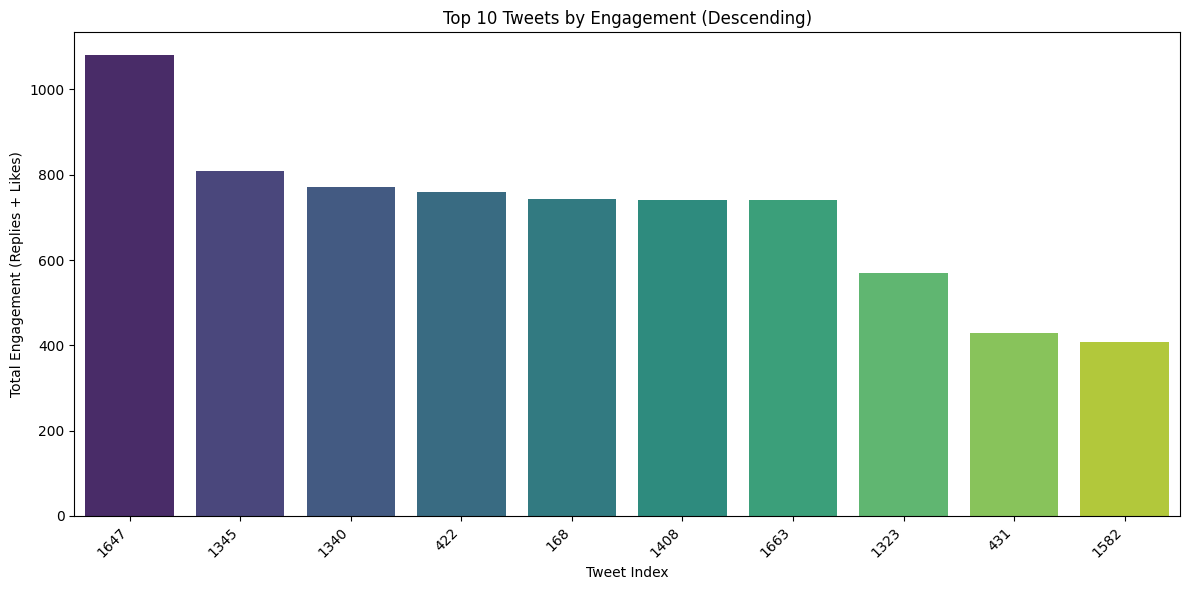

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final_sorted = df_final.sort_values(by='engagement', ascending=False)

# Ambil 10 tweet teratas
top_n = 10
df_final_top = df_final_sorted.head(top_n)

# Tampilkan index tweet teratas, sudah urut dari tertinggi
print("Index 10 tweet dengan engagement tertinggi (urut dari terbanyak):")
print(df_final_top.index.tolist())

# Buat bar plot dengan urutan dari engagement tertinggi ke terendah
plt.figure(figsize=(12, 6))
sns.barplot(x=df_final_top.index, y='engagement', data=df_final_top,
            palette='viridis', order=df_final_top.index)
plt.title(f'Top {top_n} Tweets by Engagement (Descending)')
plt.xlabel('Tweet Index')
plt.ylabel('Total Engagement (Replies + Likes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
# Simpan index tweet teratas ke variabel
top_indices = df_final_top.index.tolist()

# Ambil full_text dan tweet_url berdasarkan index
list_text = list(df_final.loc[top_indices, 'text'])
list_url = list(df_final.loc[top_indices, 'url'])

# Tampilkan hasil seperti format yang diinginkan
for i in range(len(list_text)):
    print(f"{i+1}. Link [{list_url[i]}] : {list_text[i]}")


1. Link [https://x.com/undefined/status/1927394367938937280] : Mahkamah Konstitusi (MK) memutuskan perkara Nomor 3/PUU-XXII/2024 terkait pengujian Undang-Undang Nomor 20 Tahun 2003 tentang Sistem Pendidikan Nasional (UU Sisdiknas). MK memvonis bahwa pendidikan dasar 9 tahun baik negeri maupun swasta harus digratiskan. Merujuk situs https://t.co/tOl2OlJ9v5
2. Link [https://x.com/undefined/status/1927685329298886985] : @kegblgnunfaedh swasta gratis? no thanks apapun yg gratis ga akan ada yg hasilnya bagus gw tetep pilih sekolah yg berbayar biar klo ada yg ga sesuai ama kualitas pendidikan anak gw gw bisa protes kalo gratisan? pffttt
3. Link [https://x.com/undefined/status/1927693319213051995] : @kompascom Klo negeri gajadi masalah klo swasta menurutku keliru. Kalo swasta kan murni 100% dari SPP dan uang masuk bukan dibayarin negara. Paling banter ya subsidi 50% sekolah swasta.
4. Link [https://x.com/undefined/status/1927343322445607297] : Tok! MK Perintahkan Pemerintah Gratiskan Pendidik

In [11]:
df_final_top

,text,sentiment,username,created_at,likes,reply_count,url,new,cleaning,no_stopwords,stemmed_text,engagement
1647,Mahkamah Konstitusi (MK) memutuskan perkara No...,neutral,NaN,2025-05-27 16:00:01,933.000,147,https://x.com/undefined/status/192739436793893...,Mahkamah Konstitusi (MK) memutuskan perkara No...,mahkamah konstitusi mk memutuskan perkara nomo...,mahkamah konstitusi mk memutuskan perkara nomo...,mahkamah konstitusi mk putus perkara nomor puu...,1080.000
1345,@kegblgnunfaedh swasta gratis? no thanks apapu...,negative,NaN,2025-05-28 11:16:11,792.000,17,https://x.com/undefined/status/192768532929888...,@kegblgnunfaedh swasta gratis? no thanks apapu...,swasta gratis no thanks apapun yang gratis ti...,swasta gratis thanks apapun gratis hasilnya ba...,swasta gratis thanks apa gratis hasil bagus pi...,809.000
1340,@kompascom Klo negeri gajadi masalah klo swast...,negative,NaN,2025-05-28 11:47:56,767.000,5,https://x.com/undefined/status/192769331921305...,@kompascom Klo negeri gajadi masalah kalau swa...,klo negeri gajadi masalah kalau swasta menuru...,klo negeri gajadi swasta menurutku keliru kalo...,klo negeri gajadi swasta turut keliru kalo swa...,772.000
422,Tok! MK Perintahkan Pemerintah Gratiskan Pendi...,neutral,NaN,2025-05-27 12:37:11,696.000,64,https://x.com/undefined/status/192734332244560...,Ketok! MK Perintahkan Pemerintah Gratiskan Pen...,ketok mk perintahkan pemerintah gratiskan pend...,ketok mk perintahkan pemerintah gratiskan pend...,ketok mk perintah pemerintah gratis pendidikan...,760.000
168,Breaking News: MK putuskan SD-SMP negeri dan s...,neutral,NaN,2025-05-27 10:21:50,4.754,738,https://x.com/undefined/status/192730926175683...,Breaking News: MK putuskan Sekolah Dasar-Sekol...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putus sekolah dasarsekolah te...,742.754
1408,Breaking News: MK putuskan SD-SMP negeri dan s...,neutral,NaN,2025-05-27 10:21:50,4.756,737,https://x.com/undefined/status/192730926175683...,Breaking News: MK putuskan Sekolah Dasar-Sekol...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putus sekolah dasarsekolah te...,741.756
1663,Breaking News: MK putuskan SD-SMP negeri dan s...,neutral,NaN,2025-05-27 10:21:50,4.755,737,https://x.com/undefined/status/192730926175683...,Breaking News: MK putuskan Sekolah Dasar-Sekol...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putuskan sekolah dasarsekolah...,breaking news mk putus sekolah dasarsekolah te...,741.755
1323,@BudiBukanIntel Bagus sih tapi prakteknya sptn...,negative,NaN,2025-05-28 13:03:54,568.000,1,https://x.com/undefined/status/192771243472423...,@BudiBukanIntel Bagus memang tapi prakteknya s...,bagus memang tapi prakteknya sptnya susah swa...,bagus prakteknya sptnya susah swasta mahal for...,bagus praktek sptnya susah swasta mahal for a ...,569.000
431,Unpopular Opinion: (Sebenernya ga unpopular ju...,negative,NaN,2025-05-27 04:43:01,412.000,17,https://x.com/undefined/status/192722399552860...,Unpopular Opinion: (Sebenernya tidak unpopular...,unpopular opinion sebenernya tidak unpopular j...,unpopular opinion sebenernya unpopular sekolah...,unpopular opinion sebenernya unpopular sekolah...,429.000
1582,Mahkamah Konstitusi (MK) memutuskan perkara No...,neutral,NaN,2025-05-28 10:27:54,3.803,404,https://x.com/undefined/status/192767317705408...,Mahkamah Konstitusi (MK) memutuskan perkara No...,mahkamah konstitusi mk memutuskan perkara nomo...,mahkamah konstitusi mk memutuskan perkara nomo...,mahkamah konstitusi mk putus perkara nomor puu...,407.803


###Interpretasi
Tweet dengan engagement tertinggi didominasi oleh berita (netral) dan respons negatif, mencerminkan kekhawatiran publik terhadap implementasi pendidikan gratis.

#Distribusi Sentimen

##Distribusi Sentimen Gabungan (Twitter dan Youtube)

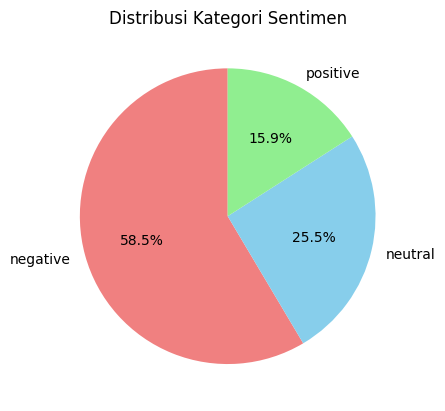

In [12]:
import matplotlib.pyplot as plt

# Hitung distribusi dan ubah index-nya ke label sentimen
category_counts = df_final['sentiment'].value_counts()

# Membuat pie chart
category_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['lightcoral', 'skyblue', 'lightgreen'],
    startangle=90
)

# Menambahkan judul
plt.title('Distribusi Kategori Sentimen')

# Menghilangkan label y
plt.ylabel('')

# Menampilkan chart
plt.show()


###Interpretasi
- Mayoritas netizen bersentimen negatif (58.5%), mencerminkan keraguan terhadap kesiapan pemerintah.

- Sentimen netral (25.5%) menunjukkan sikap menunggu kejelasan teknis.

- Sentimen positif (15.9%) masih rendah, menandakan minimnya dukungan terhadap keputusan MK.

## Perbandingan Distribusi Sentimen pada Twitter dan Youtube

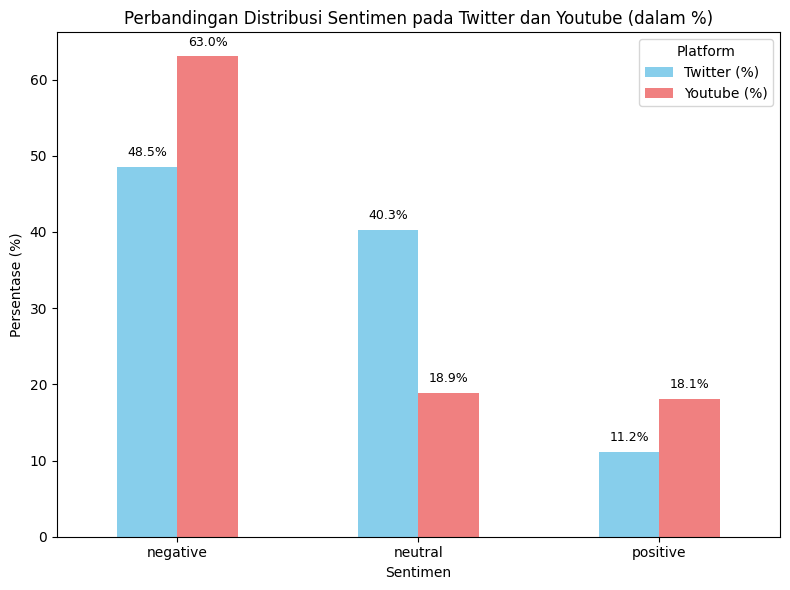

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung distribusi sentimen untuk Twitter dan Youtube
sentiment_counts_tweet = df_tweet['sentiment'].value_counts().sort_index()
sentiment_counts_youtube = df_youtube['sentiment'].value_counts().sort_index()

# Hitung persentase masing-masing sentimen per platform
sentiment_pct_tweet = (sentiment_counts_tweet / sentiment_counts_tweet.sum()) * 100
sentiment_pct_youtube = (sentiment_counts_youtube / sentiment_counts_youtube.sum()) * 100

# Gabungkan data persentase sentimen untuk kedua platform ke dalam satu DataFrame
sentiment_comparison_pct = pd.DataFrame({
    'Twitter (%)': sentiment_pct_tweet,
    'Youtube (%)': sentiment_pct_youtube
}).fillna(0)

# Buat bar plot perbandingan persentase
plt.figure(figsize=(8, 6))
ax = sentiment_comparison_pct.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Perbandingan Distribusi Sentimen pada Twitter dan Youtube (dalam %)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.tight_layout()

# Tambahkan label persentase di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,  # sedikit offset supaya label tidak nempel batang
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9)

plt.show()

###Interpretasi
- Sentimen negatif dominan di kedua platform, terutama di YouTube.

- Twitter lebih banyak mengandung sentimen netral.

- YouTube memiliki sentimen positif lebih tinggi dibanding Twitter.

Secara umum, YouTube cenderung lebih emosional, Twitter lebih netral.

#Word Cloud

In [14]:
# Mengolah kembali stopword, karena terdapat kata-kata baru yang mengganggu Word Cloud
# Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan sentimen)
# stopword khusus
stopword_nat = {'sekolah','swasta','negeri','gratis','sd','smp',
                'putusan','mk','sd-smp','pemerintah','iya'}


In [15]:
# Install the library if not already installed
!pip install textblob

# Fungsi Pembersih stopword
from textblob import TextBlob # Import TextBlob


In [16]:
# Fungsi Pembersih stopword
!pip install textblob nltk
from textblob import TextBlob
import nltk

try:
    TextBlob("").tokenize()
except LookupError:
    print("Downloading TextBlob corpora...")
    !python -m textblob.download_corpora

def clean_text(text, stopwords):
    if not isinstance(text, str):
        return ""

    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

# Membuat kolom baru tanpa stopword khusus
# Pastikan kolom yang akan diproses ada di DataFrame
if 'stemmed_text' in df_final.columns:
    df_final['stemmed_text_new'] = df_final['stemmed_text'].apply(lambda x: clean_text(x, stopword_nat))
    print("Column 'stemmed_text_new' created successfully.")
else:
    print("Error: Column 'stemmed_text' not found in the DataFrame.")

df_final.head()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
Column 'stemmed_text_new' created successfully.


,text,sentiment,username,created_at,likes,reply_count,url,new,cleaning,no_stopwords,stemmed_text,engagement,stemmed_text_new
0,MK Putuskan SD-SMP Swasta Gratis Komisi X DPR ...,neutral,NaN,2025-05-30 04:22:59,1.0,0,https://x.com/undefined/status/192830611885126...,MK Putuskan Sekolah Dasar-Sekolah Menengah Per...,mk putuskan sekolah dasarsekolah menengah pert...,mk putuskan sekolah dasarsekolah menengah swas...,mk putus sekolah dasarsekolah tengah swasta gr...,1.0,putus dasarsekolah tengah komisi x dpr dorong ...
1,Komisi X DPR RI berkomitmen mengawal implement...,neutral,NaN,2025-05-30 04:19:07,0.0,0,https://x.com/undefined/status/192830514333582...,Komisi X DPR RI berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri berkomitmen mengawal implement...,komisi x dpr ri komitmen awal implementasi put...,0.0,komisi x dpr ri komitmen awal implementasi put...
2,MK Putuskan SD-SMA Negeri dan Swasta Gratis Pa...,neutral,NaN,2025-05-30 04:11:28,3.0,2,https://x.com/undefined/status/192830322054963...,MK Putuskan Sekolah Dasar-Sekolah Menengah Ata...,mk putuskan sekolah dasarsekolah menengah atas...,mk putuskan sekolah dasarsekolah menengah nege...,mk putus sekolah dasarsekolah tengah negeri sw...,5.0,putus dasarsekolah tengah pakar pendidikan ama...
3,Respons Wamendagri Bima Arya soal Pendidikan G...,neutral,NaN,2025-05-30 04:03:08,3.0,0,https://x.com/undefined/status/192830112260070...,Respons Wamendagri Bima Arya soal Pendidikan G...,respons wamendagri bima arya soal pendidikan g...,respons wamendagri bima arya pendidikan gratis...,respons wamendagri bima arya pendidikan gratis...,3.0,respons wamendagri bima arya pendidikan putus ...
4,Respons Pemkab Bantul Soal Putusan MK tentang ...,neutral,NaN,2025-05-30 03:50:46,0.0,0,https://x.com/undefined/status/192829801043108...,Respons Pemkab Bantul Soal Putusan MK tentang ...,respons pemkab bantul soal putusan mk tentang ...,respons pemkab bantul putusan mk sekolah grati...,respons pemkab bantul putus mk sekolah gratis ...,0.0,respons pemkab bantul putus


In [17]:
# Fungsi untuk memanggil baris yang mengandung beberapa keyword
def filter_teks_multi_kata(df_final, kolom, kata_kunci):
    # Membuat filter untuk semua kata kunci
    mask = df_final[kolom].str.contains(kata_kunci[0], case=False, na=False)
    for kata in kata_kunci[1:]:
        mask &= df_final[kolom].str.contains(kata, case=False, na=False)
    return df_final[mask]

In [18]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt